In [1]:
! pip install numpy matplotlib plotly pgmpy seaborn

     ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
     --------------------------------------- 0.0/14.7 MB 660.6 kB/s eta 0:00:23
     ---------------------------------------- 0.1/14.7 MB 1.1 MB/s eta 0:00:14
      --------------------------------------- 0.3/14.7 MB 2.0 MB/s eta 0:00:08
      --------------------------------------- 0.3/14.7 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.5/14.7 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.6/14.7 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/14.7 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/14.7 MB 4.6 MB/s eta 0:00:03
     ----- ---------------------------------- 2.1/14.7 MB 5.4 MB/s eta 0:00:03
     ------ --------------------------------- 2.3/14.7 MB 5.4 MB/s eta 0:00:03
     ---------- ----------------------------- 3.9/14.7 MB 7.7 MB/s eta 0:00:02
     -------------- ------------------------- 5.5/14.7 MB 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\govin\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\govin\AppData\Local\Programs\Python\Python310\lib\site-packages\pgmpy\global_vars.py:11: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  device = torch.device("cpu")
c:\Users\govin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model is consistent:  True

Nodes in the Bayesian Network:
['Introduction to Programming', 'Basic Syntax', 'Data Types', 'Variables and Constants', 'Operators', 'Control Structures', 'If-else statements', 'Switch statements', 'Loops', 'For loop', 'While loop', 'Do-while loop', 'Functions', 'Arrays and Vectors', 'Pointers', 'Strings', 'File I/O', 'Object-Oriented Programming', 'Classes and Objects', 'Inheritance and Polymorphism']

Edges in the Bayesian Network:
[('Introduction to Programming', 'Basic Syntax'), ('Basic Syntax', 'Data Types'), ('Data Types', 'Variables and Constants'), ('Data Types', 'Functions'), ('Data Types', 'Arrays and Vectors'), ('Data Types', 'Pointers'), ('Data Types', 'Strings'), ('Data Types', 'File I/O'), ('Data Types', 'Object-Oriented Programming'), ('Variables and Constants', 'Operators'), ('Operators', 'Control Structures'), ('Operators', 'Loops'), ('Control Structures', 'If-else statements'), ('Control Structures', 'Switch statements'), ('Loops', 'For loo

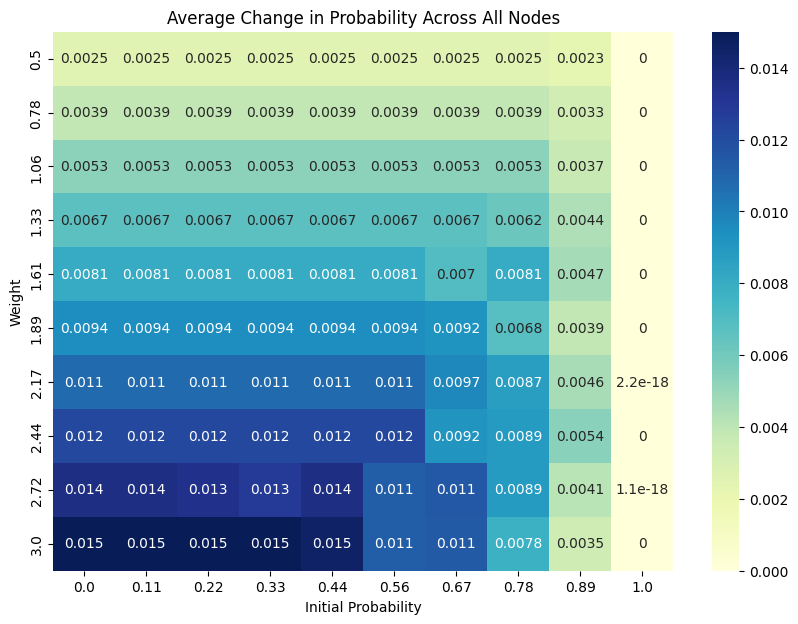

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import seaborn as sns

# Create the Bayesian Model with the defined edges (from the previous code)
edges = [
    ('Introduction to Programming', 'Basic Syntax'),
    ('Basic Syntax', 'Data Types'),
    ('Data Types', 'Variables and Constants'),
    ('Variables and Constants', 'Operators'),
    ('Operators', 'Control Structures'),
    ('Control Structures', 'If-else statements'),
    ('Control Structures', 'Switch statements'),
    ('Operators', 'Loops'),
    ('Loops', 'For loop'),
    ('Loops', 'While loop'),
    ('Loops', 'Do-while loop'),
    ('Data Types', 'Functions'),
    ('Data Types', 'Arrays and Vectors'),
    ('Data Types', 'Pointers'),
    ('Data Types', 'Strings'),
    ('Data Types', 'File I/O'),
    ('Data Types', 'Object-Oriented Programming'),
    ('Object-Oriented Programming', 'Classes and Objects'),
    ('Object-Oriented Programming', 'Inheritance and Polymorphism'),
]
model = BayesianNetwork(edges)

# Define the Conditional Probability Distributions (CPDs) for each node
cpd_intro_prog = TabularCPD(variable='Introduction to Programming',variable_card=2,
                            values=[[0.5], [0.5]])

cpd_basic_syntax = TabularCPD(variable='Basic Syntax', variable_card=2,
                              values=[[0.8, 0.2], [0.2, 0.8]],
                              evidence=['Introduction to Programming'],
                              evidence_card=[2])

cpd_data_types = TabularCPD(variable='Data Types', variable_card=2,
                            values=[[0.9, 0.3], [0.1, 0.7]],
                            evidence=['Basic Syntax'],
                            evidence_card=[2])

cpd_variables_constants = TabularCPD(variable='Variables and Constants', variable_card=2,
                                     values=[[0.8, 0.2], [0.2, 0.8]],
                                     evidence=['Data Types'],
                                     evidence_card=[2])

cpd_operators = TabularCPD(variable='Operators', variable_card=2,
                           values=[[0.9, 0.3], [0.1, 0.7]],
                           evidence=['Variables and Constants'],
                           evidence_card=[2])

cpd_control_structures = TabularCPD(variable='Control Structures', variable_card=2,
                                    values=[[0.8, 0.2], [0.2, 0.8]],
                                    evidence=['Operators'],
                                    evidence_card=[2])

cpd_if_else = TabularCPD(variable='If-else statements', variable_card=2,
                         values=[[0.9, 0.4], [0.1, 0.6]],
                         evidence=['Control Structures'],
                         evidence_card=[2])

cpd_switch = TabularCPD(variable='Switch statements', variable_card=2,
                         values=[[0.9, 0.4], [0.1, 0.6]],
                         evidence=['Control Structures'],
                         evidence_card=[2])

cpd_loops = TabularCPD(variable='Loops', variable_card=2,
                       values=[[0.8, 0.2], [0.2, 0.8]],
                       evidence=['Operators'],
                       evidence_card=[2])

cpd_for = TabularCPD(variable='For loop', variable_card=2,
                     values=[[0.9, 0.4], [0.1, 0.6]],
                     evidence=['Loops'],
                     evidence_card=[2])

cpd_while = TabularCPD(variable='While loop', variable_card=2,
                       values=[[0.9, 0.4], [0.1, 0.6]],
                       evidence=['Loops'],
                       evidence_card=[2])

cpd_do_while = TabularCPD(variable='Do-while loop', variable_card=2,
                          values=[[0.9, 0.4], [0.1, 0.6]],
                          evidence=['Loops'],
                          evidence_card=[2])

cpd_functions = TabularCPD(variable='Functions', variable_card=2,
                           values=[[0.9, 0.4], [0.1, 0.6]],
                           evidence=['Data Types'],
                           evidence_card=[2])

cpd_arrays_vectors = TabularCPD(variable='Arrays and Vectors', variable_card=2,
                                values=[[0.9, 0.4], [0.1, 0.6]],
                                evidence=['Data Types'],
                                evidence_card=[2])

cpd_pointers = TabularCPD(variable='Pointers', variable_card=2,
                          values=[[0.9, 0.4], [0.1, 0.6]],
                          evidence=['Data Types'],
                          evidence_card=[2])

cpd_strings = TabularCPD(variable='Strings',variable_card=2,
                         values=[[0.9, 0.4], [0.1, 0.6]],
                         evidence=['Data Types'],
                         evidence_card=[2])

cpd_file_io = TabularCPD(variable='File I/O', variable_card=2,
                         values=[[0.9, 0.4], [0.1, 0.6]],
                         evidence=['Data Types'],
                         evidence_card=[2])

cpd_oop = TabularCPD(variable='Object-Oriented Programming', variable_card=2,
                      values=[[0.8, 0.2], [0.2, 0.8]], 
                      evidence=['Data Types'],
                      evidence_card=[2])

cpd_classes = TabularCPD(variable='Classes and Objects', variable_card=2,
                         values=[[0.9, 0.3], [0.1, 0.7]], 
                         evidence=['Object-Oriented Programming'], 
                         evidence_card=[2])

cpd_inheritance = TabularCPD(variable='Inheritance and Polymorphism', variable_card=2,
                             values=[[0.9, 0.3], [0.1, 0.7]], 
                             evidence=['Object-Oriented Programming'],
                             evidence_card=[2])
# Add the CPDs to the model
model.add_cpds(cpd_intro_prog, cpd_basic_syntax, cpd_data_types, cpd_variables_constants, cpd_operators,
                cpd_control_structures, cpd_if_else, cpd_switch, cpd_loops, cpd_for, cpd_while, cpd_do_while, 
                cpd_functions, cpd_arrays_vectors, cpd_pointers, cpd_strings, cpd_file_io, cpd_oop, cpd_classes, cpd_inheritance)

# Check if the model is consistent
print("Model is consistent: ", model.check_model())

# Print the nodes in the model
print("\nNodes in the Bayesian Network:")
print(model.nodes())

# Print the edges in the model
print("\nEdges in the Bayesian Network:")
print(model.edges())

nodes_name = ['Introduction to Programming','Basic Syntax','Data Types','Variables and Constants','Operators',
    'Control Structures','If-else statements','Switch statements','Loops','For loop','While loop',
    'Do-while loop','Functions','Arrays and Vectors','Pointers','Strings','File I/O','Object-Oriented Programming',
    'Classes and Objects','Inheritance and Polymorphism']

weight = [1,1,1.5,1.5,1,1.5,1.5,1.5,2,2,2,2,2,2.5,2.5,2.5,2,3,3,3]

# Adding content to the nodes
for x in nodes_name:
    model._node[x]['content'] = f'Content for {x}'

# Adding initial probability to the nodes
for x in nodes_name:
    model._node[x]['probability_known'] = 0.3

# Adding weights to the nodes
for x,i in zip(nodes_name,weight):
    model._node[x]['weight'] = i

# Accessing and printing content of the nodes
for node in model.nodes():
    print(f"Node: {node}")
    print(f"Content: {model._node[node]['content']}\n")

    
def update_child_cpd(node, correct_answer):
    update_factor = model._node[node]['weight']
    if correct_answer:
        model._node[node]['probability_known'] += update_factor * 0.1
    else:
        model._node[node]['probability_known'] -= update_factor * 0.1

    model._node[node]['probability_known'] = max(0, min(1, model._node[node]['probability_known']))

    cpd = TabularCPD(node, 2, [[1 - model._node[node]['probability_known']], [model._node[node]['probability_known']]])
    model.add_cpds(cpd)

def update_parent_cpd(node):
    child_nodes = model.get_children(node)
    total_weight = sum([model._node[child]['weight'] for child in child_nodes])
    
    updated_probability_known = 0
    for child in child_nodes:
        weight = model._node[child]['weight']
        updated_probability_known += (weight / total_weight) * model._node[child]['probability_known']
    
    parent_weight = model._node[node]['weight']
    model._node[node]['probability_known'] = (parent_weight * updated_probability_known + model._node[node]['probability_known']) / (parent_weight + 1)
    cpd = TabularCPD(node, 2, [[1 - model._node[node]['probability_known']], [model._node[node]['probability_known']]])
    model.add_cpds(cpd)


def update_cpd(node, correct_answer):
    update_child_cpd(node, correct_answer)
    parent_nodes = model.get_parents(node)
    for parent_node in parent_nodes:
        update_parent_cpd(parent_node)


def can_access_node(node):
    """
    Checks if the user can access a node based on the satisfaction of its parent nodes.
    """
    parents = model.get_parents(node)
    if not parents:
        return True

    inference = VariableElimination(model)
    for parent in parents:
        probability_known = inference.query([parent]).values[1]
        if probability_known < 0.7:
            return False
    return True

# Simulate user's interaction with the system
nodes = model.nodes()

def simulate_user_interaction(node, prob_correct):
    if can_access_node(node):
        print(f"Node: {node}")
        print(f"Content: {model._node[node]['content']}\n")
        
        # Update the CPD of the node based on the probability of the user's answer being correct
        update_cpd(node, prob_correct)
    else:
        print(f"Cannot access node: {node} due to unsatisfied parent requirements.\n")

# Test with an example
simulate_user_interaction('Data Types', 0.785)

for cpd in model.get_cpds():
    print(cpd)

def print_final_probabilities():
    # inference = VariableElimination(model)
    for node in model.nodes():
        # probability_known = inference.query([node]).values[1]
        probability_known = model._node[node]['probability_known']
        print(f"Node: {node}, Probability known: {probability_known:.2f}")

# Call this function to print the final probabilities
print_final_probabilities()


def generate_plot_data(child_node, parent_node):
    weights = np.linspace(0.5, 3, 10)
    probabilities = np.linspace(0, 1, 10)

    original_weight = model._node[parent_node]['weight']
    original_probability_known = model._node[child_node]['probability_known']

    final_probabilities = np.zeros((len(weights), len(probabilities)))

    for i, weight in enumerate(weights):
        model._node[parent_node]['weight'] = weight

        for j, prob_correct in enumerate(probabilities):
            model._node[child_node]['probability_known'] = prob_correct
            update_cpd(child_node, prob_correct)

            final_probabilities[i, j] = model._node[parent_node]['probability_known']

    model._node[parent_node]['weight'] = original_weight
    model._node[child_node]['probability_known'] = original_probability_known

    return final_probabilities

def plot_3d_scatter(child_node, parent_node):
    weights = np.linspace(0.5, 3, 10)
    probabilities = np.linspace(0, 1, 10)

    final_probabilities = generate_plot_data(child_node, parent_node)

    x_data = []
    y_data = []
    z_data = []

    for i, weight in enumerate(weights):
        for j, prob_correct in enumerate(probabilities):
            if weight==0.5:
                continue
            x_data.append(weight)
            y_data.append(prob_correct)
            z_data.append(final_probabilities[i, j])

    fig = px.scatter_3d(x=x_data, y=y_data, z=z_data, color=z_data, labels={'x': 'Weight of Parent Node', 'y': 'Probability of Correct Answer', 'z': 'Final Probability'}, title=f'3D Scatter Plot for {parent_node} (Parent of {child_node})')
    fig.show()

def process_node(node):
    children_nodes = list(model.successors(node))
    if not children_nodes:
        return
    
    parent_nodes = model.predecessors(node)
    for parent_node in parent_nodes:
        plot_3d_scatter(node, parent_node)
    
    for child_node in children_nodes:
        process_node(child_node)

root_node = 'Introduction to Programming'  
process_node(root_node)


def exhaustive_simulation(weight_range, probability_range, num_simulations):
    weights = np.linspace(*weight_range, num_simulations)
    probabilities = np.linspace(*probability_range, num_simulations)
    average_probability_changes = np.zeros((len(weights), len(probabilities)))

    for node in model.nodes():
        model._node[node]['original_probability_known'] = model._node[node]['probability_known']

    for i, w in enumerate(weights):
        for j, p in enumerate(probabilities):
            for node in model.nodes():
                model._node[node]['probability_known'] = p
                model._node[node]['weight'] = w

            total_change = 0

            for _ in range(num_simulations):
                selected_node = np.random.choice(model.nodes())
                prob_correct = np.random.rand()
                initial_probability_known = model._node[selected_node]['probability_known']

                # Temporarily store the original CPDs
                original_cpds = model.get_cpds()

                # Update the CPDs without modifying the network structure
                update_cpd(selected_node, prob_correct)

                # Revert the CPDs to their original state
                model.remove_cpds(*model.cpds)
                model.add_cpds(*original_cpds)

                final_probability_known = model._node[selected_node]['probability_known']
                total_change += abs(final_probability_known - initial_probability_known)

            average_probability_changes[i, j] = total_change / (num_simulations * len(model.nodes()))

            # Reset the probabilities for the next iteration
            for node in model.nodes():
                model._node[node]['probability_known'] = model._node[node]['original_probability_known']

    return average_probability_changes, weights, probabilities




weight_range = (0.5, 3)
probability_range = (0, 1)
num_simulations = 10

average_probability_changes, weights, probabilities = exhaustive_simulation(weight_range, probability_range, num_simulations)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(average_probability_changes, annot=True, cmap="YlGnBu", xticklabels=np.round(probabilities, 2), yticklabels=np.round(weights, 2), ax=ax)
ax.set_xlabel("Initial Probability")
ax.set_ylabel("Weight")
ax.set_title("Average Change in Probability Across All Nodes")
plt.show()

